## Using text in AI systems

### Text processing
* Cleaning
    * get rid of garbage 
    * handle punctuation
    * lower the text
    * stemming / lemming
    * get rid of stopwords
* Choices
    * use letters
    * use words
    * sequence delimiter
* Building a vocabulary

### The ML part
* Embedding text to numbers
    * making a vocab
    * different tehniques (CBOW/SkipGram)
    * vectorizing the text
* Arhitecture choices
    * RNN vs CNN
    * LSTM vs GRU

### Cleaning text

In [1]:
pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached regex-2024.11.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (796 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
   ---------------------------------------- 3/3 [nltk]------------- 2/3 [nltk]
Note: you may need to restart the kernel to use updated packages.


In [2]:
import string
import re
import nltk
import json
import numpy as np
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import scipy

In [3]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cosinus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
sample = 'ANA are3 mere!!! ! !  GAMING Dar ioana.....? ┤ÑI▄ë. the the the the banking'

In [5]:
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [6]:
# Garbage (here we clean non-printable characters)
# sample = ''.join(filter(lambda x: x in string.printable, sample))
sample = ''.join([el for el in sample if el in string.printable])
print(sample)

ANA are3 mere!!! ! !  GAMING Dar ioana.....? I. the the the the banking


In [7]:
#Spacing (here we space out punctuation / numbers)
sample = re.sub('([.,#!?()0-9])', r' \1 ', sample)
print(sample)

ANA are 3  mere !  !  !   !   !   GAMING Dar ioana .  .  .  .  .  ?  I .  the the the the banking


In [8]:
sample = re.sub('\s{2,}', ' ', sample)
print(sample)

ANA are 3 mere ! ! ! ! ! GAMING Dar ioana . . . . . ? I . the the the the banking


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3426/3995706716.py:1: SyntaxWarning: invalid escape sequence '\s'
  sample = re.sub('\s{2,}', ' ', sample)


In [9]:
#Text lowering
sample = sample.lower()
print(sample)

ana are 3 mere ! ! ! ! ! gaming dar ioana . . . . . ? i . the the the the banking


In [7]:
#Stemming
from nltk.stem import PorterStemmer 
ps = PorterStemmer()

print(ps.stem('angrily'))

angrili


In [16]:
sample = ' '.join([ps.stem(word) for word in sample.split()])
print(sample)

ana 3 mere ! ! ! ! ! game dar ioana . . . . . ? . bank


In [12]:
#removing stopwords
from nltk.corpus import stopwords
eng_stopwords = stopwords.words('english')
print(eng_stopwords)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [13]:
eng_stopwords = set(eng_stopwords)
sample = ' '.join([word for word in sample.split() if word not in eng_stopwords])
print(sample)

ana 3 mere ! ! ! ! ! game dar ioana . . . . . ? . bank


In [18]:
#Vocab building
with open('dset.json') as f:
    dataset = json.load(open('dset.json'))
dataset[:3]

[{'ItemID': '1',
  'Sentiment': '0',
  'SentimentText': 'is so sad for my APL friend.............'},
 {'ItemID': '2',
  'Sentiment': '0',
  'SentimentText': 'I missed the New Moon trailer...'},
 {'ItemID': '3', 'Sentiment': '1', 'SentimentText': 'omg its already 7:30 :O'}]

In [20]:
def process_seq(sample):
    sample = ''.join(filter(lambda x: x in string.printable, sample))
    sample = re.sub('([.,#!?()0-9])', r' \1 ', sample)
    sample = re.sub('\s{2,}', ' ', sample)
    sample = sample.lower()
    sample = ' '.join([ps.stem(word) for word in sample.split()])
    sample = ' '.join([word for word in sample.split() if word not in eng_stopwords])
    return sample

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3426/1901166793.py:4: SyntaxWarning: invalid escape sequence '\s'
  sample = re.sub('\s{2,}', ' ', sample)


In [21]:
unparsed_seq = [el['SentimentText'] for el in tqdm(dataset)]
sequences = [process_seq(el['SentimentText']) for el in tqdm(dataset)]

/tmp/ipykernel_3426/2713431873.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  unparsed_seq = [el['SentimentText'] for el in tqdm(dataset)]


  0%|          | 0/100000 [00:00<?, ?it/s]

/tmp/ipykernel_3426/2713431873.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  sequences = [process_seq(el['SentimentText']) for el in tqdm(dataset)]


  0%|          | 0/100000 [00:00<?, ?it/s]

In [22]:
unparsed_seq[:10]

['is so sad for my APL friend.............',
 'I missed the New Moon trailer...',
 'omg its already 7:30 :O',
 ".. Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...",
 'i think mi bf is cheating on me!!!       T_T',
 'or i just worry too much?',
 'Juuuuuuuuuuuuuuuuussssst Chillin!!',
 'Sunny Again        Work Tomorrow  :-|       TV Tonight',
 'handed in my uniform today . i miss you already',
 'hmmmm.... i wonder how she my number @-)']

In [23]:
sequences[:10]

['sad apl friend . . . . . . . . . . . . .',
 'miss new moon trailer . . .',
 'omg alreadi 7 : 3 0 :o',
 ". . omgaga . im sooo im gunna cri . i'v thi dentist sinc 1 1 . . wa supos 2 get crown put ( 3 0 min ) . . .",
 'think mi bf cheat ! ! ! t_t',
 'worri much ?',
 'juuuuuuuuuuuuuuuuussssst chillin ! !',
 'sunni work tomorrow :-| tv tonight',
 'hand uniform today . miss alreadi',
 'hmmmm . . . . wonder number @- )']

In [24]:
data = ' '.join(sequences)
words = data.split(' ')
print(len(words))
print(len(set(words)))

928058
102169


In [25]:
apps = dict()
for word in words:
    apps[word] = apps.get(word, 0) + 1

In [26]:
sorted(apps.items(), key= lambda kv: kv[1], reverse=True)[:100]

[('.', 106694),
 ('!', 48772),
 ('?', 20171),
 ('1', 10562),
 ('2', 8592),
 ('0', 8514),
 ('#', 6899),
 ('3', 6771),
 ('wa', 5828),
 ('get', 5284),
 ('thank', 5080),
 ('go', 5031),
 ('good', 4908),
 ('4', 4901),
 ('like', 4752),
 ('-', 4539),
 ('lol', 4484),
 ('u', 4456),
 ('love', 4446),
 ('9', 4127),
 ('8', 3983),
 ('know', 3882),
 ('thi', 3836),
 ('5', 3801),
 ('7', 3789),
 ('@', 3777),
 ('day', 3484),
 ('6', 3426),
 ("it'", 3258),
 ('one', 3089),
 (')', 3051),
 ('work', 2981),
 ('see', 2870),
 ('(', 2842),
 ('oh', 2727),
 ('time', 2725),
 ('think', 2688),
 ('well', 2629),
 ('hope', 2607),
 ('miss', 2588),
 ('want', 2568),
 ('"', 2560),
 ('haha', 2496),
 ('im', 2444),
 ('got', 2412),
 ('realli', 2217),
 ('yeah', 2158),
 ('sorri', 2111),
 ('make', 2107),
 ('come', 2054),
 ('look', 2042),
 ("can't", 2032),
 ('&amp;', 1960),
 ('need', 1957),
 ('back', 1941),
 ('feel', 1896),
 ('still', 1857),
 ('follow', 1847),
 ('today', 1838),
 ('would', 1824),
 ('great', 1794),
 ('much', 1783),
 ("t

### Tokenization
* Character tokenization
    * simplest
    * lightweight
    * worst-performace (in general)
* Word tokenization (as seen above)
* Sub-word tokenization
    * Byte pair encoding (requires separate "training" on a corpus of text)   
    * https://platform.openai.com/tokenizer

In [27]:
vocab = [word for word in apps if apps[word] > 5]

In [28]:
1 - len(vocab) / 102182

0.9205241627683937

In [29]:
c2n = {word: i for i, word in enumerate(vocab)}

In [30]:
sm = 0
for el in sequences:
    sm += len(el.split(' '))
sm / len(sequences)

9.28058

## Dataset building

In [31]:
dataset[0]

{'ItemID': '1',
 'Sentiment': '0',
 'SentimentText': 'is so sad for my APL friend.............'}

In [32]:
sequences[0]

'sad apl friend . . . . . . . . . . . . .'

In [33]:
X, Y = [], []
for seq, el in zip(tqdm(sequences), dataset):
    t_x = []
    for word in seq.split(' '):
        if word in vocab:
            t_x.append(c2n[word])
    t_x.extend([len(vocab)] * (20 - len(t_x)))
    t_x = t_x[:20]
    X.append(t_x)
    Y.append(int(el['Sentiment']))

/tmp/ipykernel_3426/1918373273.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seq, el in zip(tqdm(sequences), dataset):


  0%|          | 0/100000 [00:00<?, ?it/s]

In [34]:
print(sequences[0])
print(X[0])

sad apl friend . . . . . . . . . . . . .
[0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8121, 8121, 8121, 8121, 8121]


In [35]:
c2n['sad']

0

In [36]:
X = np.array(X)
Y = np.array(Y)
X_train, X_test, Y_train,  Y_test = train_test_split(X, Y, test_size=.2, shuffle=True)

## Model Building

### Embeddings

#### Parsing pre-trained embedding
* https://www.kaggle.com/datasets/anmolkumar/glove-embeddings

In [38]:
with open("glove.6B.100d.txt", encoding="utf-8") as f:
    lines = f.readlines()

In [39]:
lines[0].split(maxsplit=1)

['the',
 '-0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062\n']

In [40]:
embeddings_index = {}
with open("glove.6B.100d.txt", encoding="utf-8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

In [41]:
vocab = embeddings_index.keys()

In [42]:
num_tokens = len(vocab)
embedding_dim = 100

In [43]:
c2i = {c:i for i,c in enumerate(vocab)}
i2c = {i:c for i,c in enumerate(vocab)}

In [44]:
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for i, word in enumerate(vocab):
    embedding_vector = embeddings_index.get(word)
    embedding_matrix[i] = embedding_vector

In [49]:
def find_closest(vec,n=10):
    dist = scipy.spatial.distance.cdist(embedding_matrix,vec.reshape(1,-1)).reshape(-1)

    closest_tokens = np.argsort(dist)
    closest_tokens = closest_tokens[:n]
    return [i2c[i] for i in closest_tokens]

In [50]:
vec = embeddings_index['king'] - embeddings_index['man'] + embeddings_index['woman']

In [51]:
vec = embeddings_index['europe'] - embeddings_index['france'] + embeddings_index['china']

In [52]:
find_closest(vec)

['china',
 'asia',
 'chinese',
 'japan',
 'beijing',
 'mainland',
 'taiwan',
 'asian',
 'vietnam',
 'economies']

#### Models for embedding pretraining

* https://keras.io/api/layers/core_layers/embedding/
* https://radimrehurek.com/gensim/models/word2vec.html
* https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
* https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

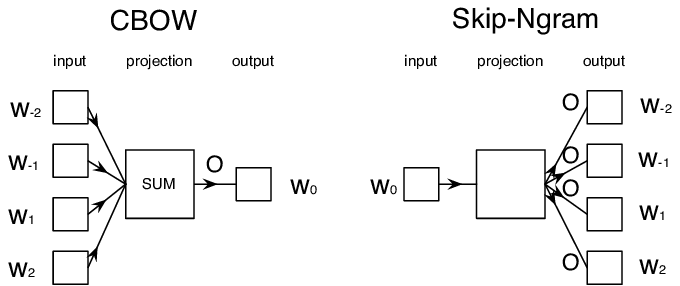

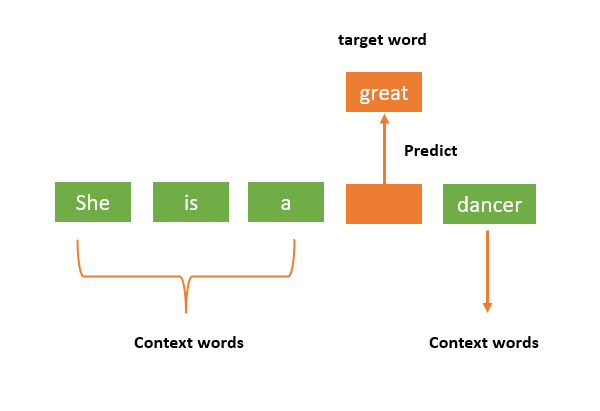

### Recurrent architectures
* Vanilla RNN (classical RNN architecture)
* Gated Recurrent Unit (GRU) and Long Short-Term Memory (LSTM) 

### RNN
$$h_t = \tanh\Big(W_{hh} \cdot h_{t-1} + W_{xh} \cdot x_t\Big)$$
$$y_t = W_{hy} \cdot h_t$$
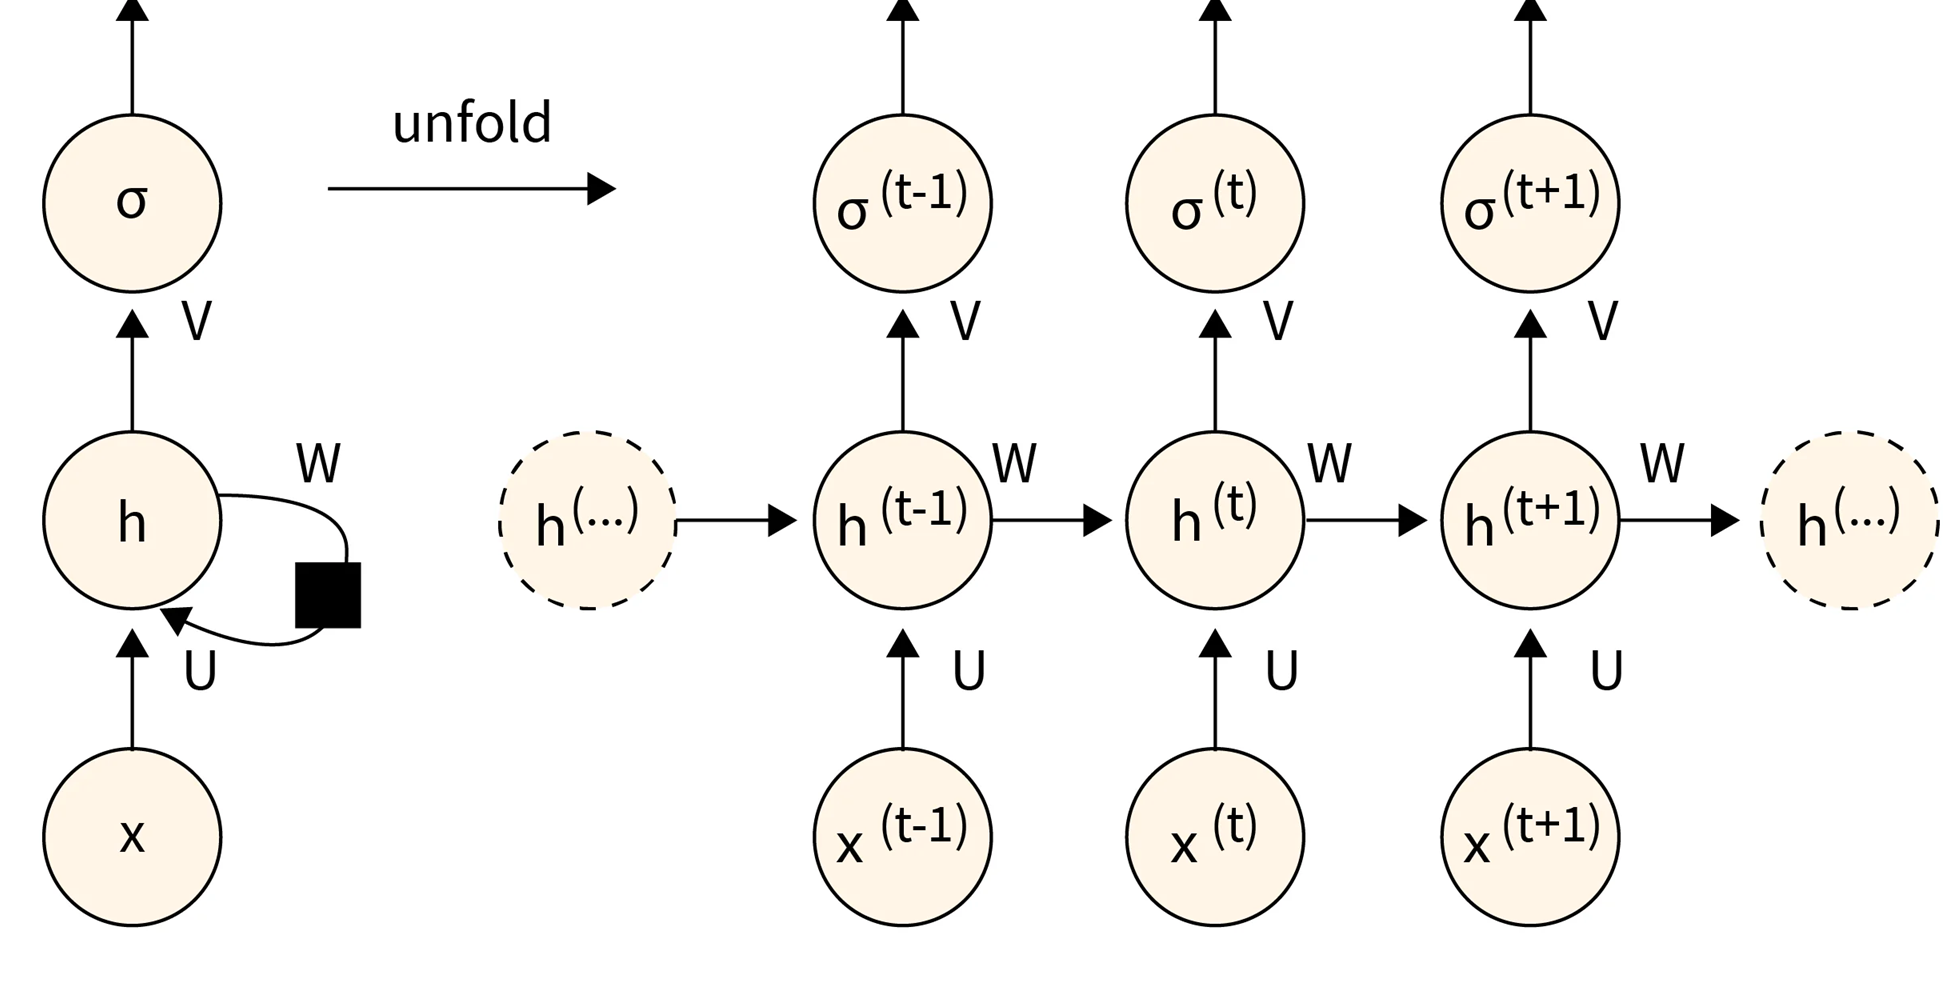

#### GRU
Reset gate: $r_t = \sigma\Big(W_r \cdot \begin{bmatrix} h_{t-1} \\ x_t \end{bmatrix}\Big)$

Update gate: $ z_t = \sigma\Big(W_z \cdot \begin{bmatrix} h_{t-1} \\ x_t \end{bmatrix}\Big) $

Candidate hidden state: $h'_t = \tanh\Big(W_h \cdot \begin{bmatrix} r_t \cdot h_{t-1} \\ x_t \end{bmatrix}\Big)$

New hidden state: $h_t = (1 - z_t) \cdot h_{t-1} + z_t \cdot h'_t$
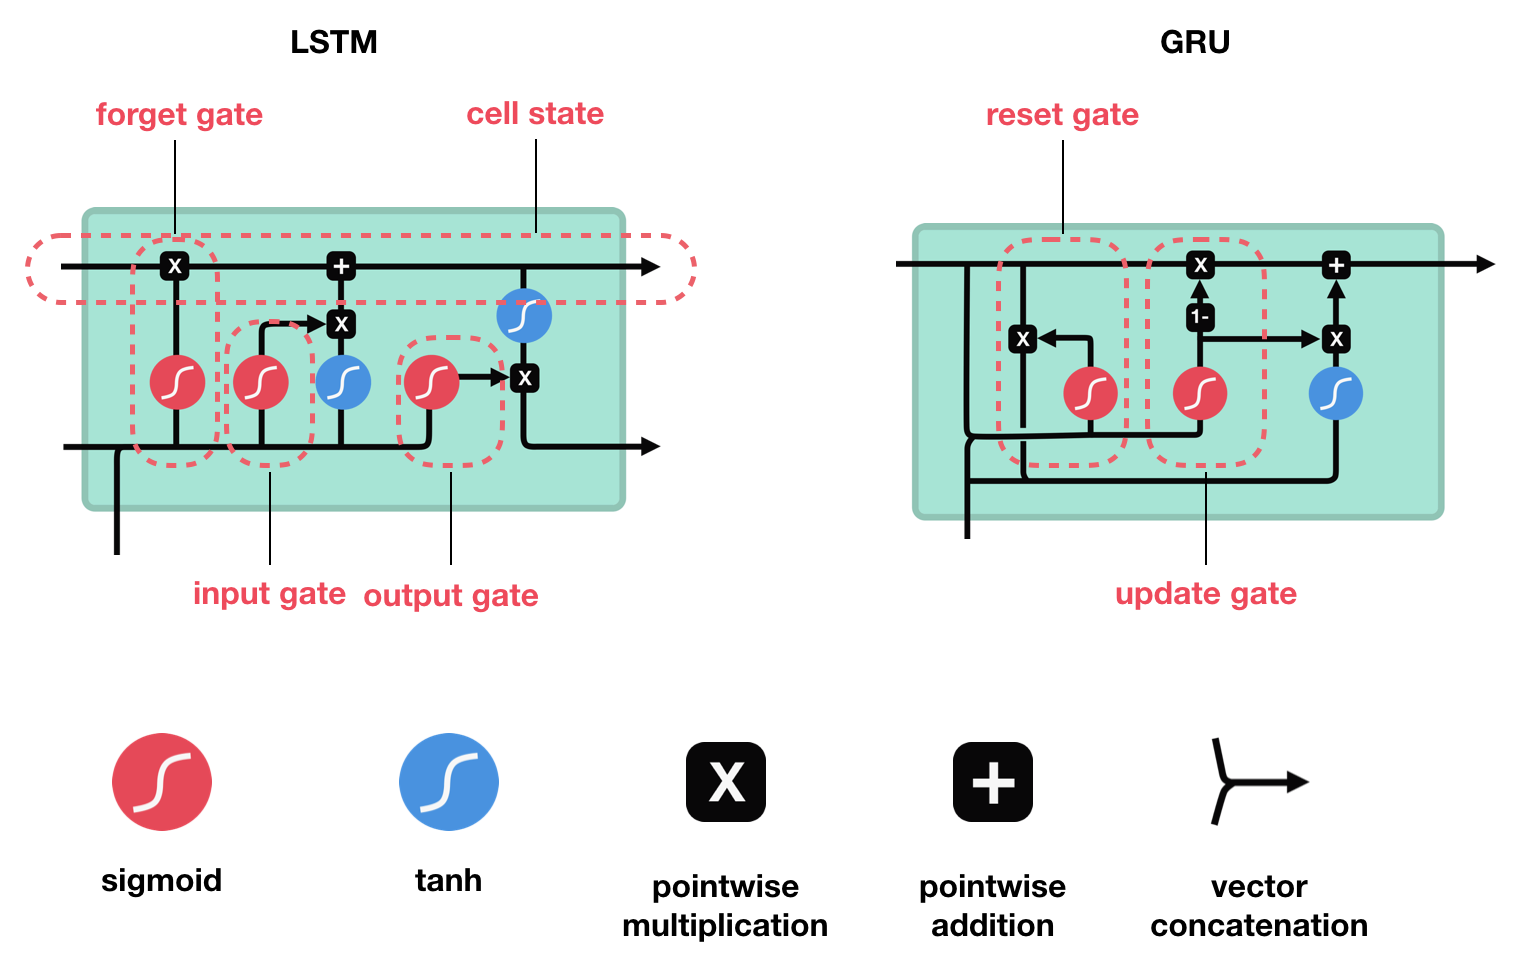

### Convolution
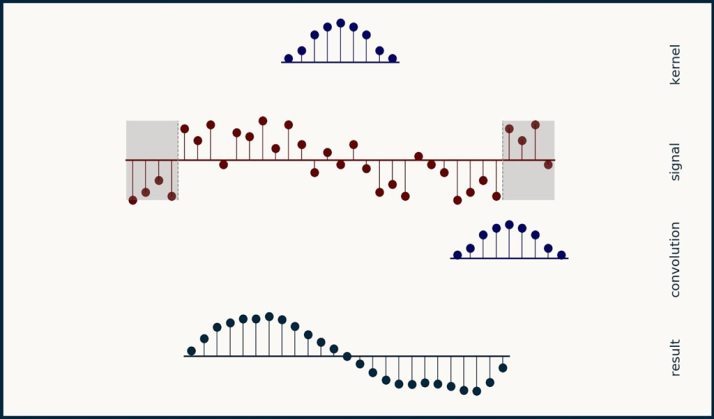
<img src=https://developers.google.com/machine-learning/practica/image-classification/images/maxpool_animation.gif>

In [6]:
import os
import tensorflow as tf
# from tensorflow.keras.utils import Sequence, to_categorical

In [7]:
from tensorflow import keras
from tensorflow.keras.layers import GRU, Embedding, Dense, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Flatten, BatchNormalization, Input

ModuleNotFoundError: No module named 'tensorflow.keras'

In [6]:
model = tf.keras.Sequential()
model.add(Embedding(input_dim=len(vocab)+2, output_dim=32))
# model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
# model.add(GlobalMaxPooling1D())
model.add(GRU(units=8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

NameError: name 'Embedding' is not defined

In [ ]:
model = tf.keras.Sequential()
model.add(Embedding(input_dim=len(vocab)+1, output_dim=32))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(GlobalMaxPooling1D())
# model.add(GRU(units=8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
model_name = '2_test.keras'

callbacks = list()
callbacks.append(EarlyStopping(monitor='val_loss', min_delta=0, mode='auto', patience=2))
callbacks.append(ModelCheckpoint(model_name, monitor='val_acc', save_weights_only=False, save_best_only=True, mode='max'))

In [ ]:
model.fit(X_train, Y_train,
        epochs=10, 
        verbose=1,
        batch_size=64,
        validation_split=0.2,
        shuffle=False,
        callbacks=callbacks,)

In [ ]:
X_train

In [ ]:
Y_pred = model.predict(X_test)
cmat = metrics.confusion_matrix(Y_test, Y_pred.round())
cmn = cmat.astype('float') / cmat.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True)

# Using a pretrained embedding 

In [ ]:
embeddings_index = {}
with open("glove.6B.100d.txt", encoding="utf-8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

In [ ]:
len(embeddings_index)

In [ ]:
vocab_2 = embeddings_index.keys()

In [ ]:
c2n = {el:i for i, el in enumerate(vocab_2)}

In [ ]:
X, Y = [], []
for seq, el in zip(tqdm(sequences), dataset):
    t_x = []
    for word in seq.split(' '):
        if word in vocab_2:
            t_x.append(c2n[word])
    t_x.extend([len(vocab_2)] * (20 - len(t_x)))
    t_x = t_x[:20]
    X.append(t_x)
    Y.append(int(el['Sentiment']))

In [ ]:
num_tokens = len(vocab_2) + 2
embedding_dim = 100
hits = 0
misses = 0

embedding_matrix = np.zeros((num_tokens, embedding_dim))
for i, word in enumerate(vocab_2):
    embedding_vector = embeddings_index.get(word)
    embedding_matrix[i] = embedding_vector

In [ ]:
model = tf.keras.Sequential()
model.add(Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
))
# model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
# model.add(GlobalMaxPooling1D())
model.add(GRU(units=8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])

In [ ]:
model_name = '3_test.h5'

callbacks = list()
callbacks.append(EarlyStopping(monitor='val_loss', min_delta=0, mode='auto', patience=2))
callbacks.append(ModelCheckpoint(model_name, monitor='val_acc', save_weights_only=False, save_best_only=True, mode='max'))

In [ ]:
model.fit(X_train, Y_train,
        epochs=100, 
        verbose=1,
        batch_size=64,
        validation_split=0.2,
        shuffle=False,
        callbacks=callbacks,)

In [ ]:
Y_pred = model.predict(X_test)
cmat = metrics.confusion_matrix(Y_test, Y_pred.round())
cmn = cmat.astype('float') / cmat.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True)

### BPE Tokenizers

In [ ]:
import json
from tqdm import tqdm

In [ ]:
with open('dset.json','r') as file:
    data = json.load(file)
    
data = [d['SentimentText'] for d in data]

In [ ]:
vocab = list(range(256))
merges = {}
new_tok = 256

In [ ]:
list(bytearray(data[1],encoding='utf-8'))

In [ ]:
tokens = [list(bytearray(d,encoding='utf-8')) for d in data]

In [ ]:
pairs = dict()
for ids in tokens:
    for pair in zip(ids[:-1],ids[1:]):
        pairs[pair] = pairs.get(pair,0) + 1

In [ ]:
best_pair = max(pairs,key=pairs.get)
best_pair

In [ ]:
merges[best_pair] = new_tok
vocab.append(new_tok)
new_tok += 1

In [ ]:
new_tokens = []
for ids in tokens:
    new_ids = []
    skip_next = 0
    
    for pair in zip(ids[:-1],ids[1:]):
        if skip_next == 1:
            skip_next = 0
            continue
            
        if pair in merges:
            new_ids.append(merges[pair])
            skip_next = 1
        else:
            new_ids.append(pair[0])
    new_tokens.append(new_ids)
tokens = new_tokens

In [ ]:
class BPETokenizer:
    def __init__(self):
        self.vocab = list(range(256))
        self.merges = dict()
        self.new_tok = 256

    @staticmethod
    def find_best_pair(pairs):
        return max(pairs,key=pairs.get)

    @staticmethod
    def count_pairs(tokens):
        pairs = dict()
        for ids in tokens:
            for pair in zip(ids[:-1],ids[1:]):
                pairs[pair] = pairs.get(pair,0) + 1
        return pairs

    def replace_new_token(self,tokens):
        new_tokens = []
        for ids in tokens:
            new_ids = []
            skip_next = 0
            
            for pair in zip(ids[:-1],ids[1:]):
                if skip_next == 1:
                    skip_next = 0
                    continue
                    
                if pair in self.merges:
                    new_ids.append(self.merges[pair])
                    skip_next = 1
                else:
                    new_ids.append(pair[0])
            new_tokens.append(new_ids)
        return new_tokens

    def step(self,tokens):
        pairs = BPETokenizer.count_pairs(tokens)
        best_pair = BPETokenizer.find_best_pair(pairs)
        
        self.merges[best_pair] = self.new_tok
        self.vocab.append(self.new_tok)
        self.new_tok += 1

        return self.replace_new_token(tokens)

    def fit(self,data,max_tokens=2000):
        tokens = [list(bytearray(d,encoding='utf-8')) for d in data]
        for _ in tqdm(range(max_tokens)):
            tokens = self.step(tokens)

In [ ]:
tokenizer = BPETokenizer()
tokenizer.fit(data,max_tokens=10)

In [ ]:
tokenizer.merges

#### Sentencepiece

In [ ]:
pip install sentencepiece

In [ ]:
with open('train.txt','w') as file:
    for d in data:
        file.write(d + '\n')

In [ ]:
import sentencepiece as spm

spm.SentencePieceTrainer.train(
    input='train.txt',
    model_prefix='mymodel',
    vocab_size=100,
    model_type='bpe'
)

In [ ]:
sp = spm.SentencePieceProcessor()
sp.load('mymodel.model')
print(sp.encode('Demo sentence... Whatever', out_type=str))